In [9]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
file_path = "../../datasets/Students_turn/adult.csv"
data = pd.read_csv(file_path, skipinitialspace = True)

### Exercise 1. Open the file with a text editor or excel and note the first impressions of the file. In addition, list the different variables that this dataset contains with the keys and type (numerical, categorical...)

In [12]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
data_clean= data.replace("?", "Not given")

In [14]:
data_clean.columns #Here we list the names of the existing columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'salary'],
      dtype='object')

In [15]:
data_clean.dtypes #We have 6 numerical columns and 9 categorical

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
salary            object
dtype: object

# Exercise 2. How many men and women (sex feature) are represented in this dataset?

In [16]:
data_clean["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Exercise 3. What is the average age (`age` feature) of women?


In [17]:
data_clean.groupby("sex")["age"].mean() #method 1

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

In [18]:
data_clean.loc[data_clean.sex == "Female", "age"].mean() #method 2

36.85823043357163

# Exercise 4. Which is the most common nacionality (native-country feature)? What is the proportion of German citizens?

In [20]:
data_clean["native-country"].mode()[0] 


'United-States'

In [17]:
(data_clean["native-country"] == "United-States").sum()/len(data_clean["native-country"])*100
#Almost 90% are from USA

89.5857006848684

In [21]:
(data_clean["native-country"] == "Germany").sum()/len(data_clean["native-country"])*100

#Only 0,42% are from Germany

0.42074874850281013

# Exercise 5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?

In [19]:
a = pd.pivot_table(data_clean, 
               values='age', 
               index='salary',
               aggfunc={np.mean, np.std})
a

# On average those that earn more that 50k are older than those that earn less. 

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


In [20]:
data_clean.groupby(['salary'])["age"].mean() 



salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

In [21]:
data_clean.groupby(['salary'])["age"].std()



salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64

# Exercise 6. Is it true that people who receive more than 50k have at least high school education? (education feature)

In [22]:
data.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [23]:
more50 = data.loc[data["salary"]==">50K", "education"]
more50.value_counts()


Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

# Exercise 7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe()

In [31]:
data.groupby(['race', 'sex'])['age'].describe().round(1).T

race  Amer-Indian-Eskimo        Asian-Pac-Islander          Black          \
sex               Female   Male             Female   Male  Female    Male   
count              119.0  192.0              346.0  693.0  1555.0  1569.0   
mean                37.1   37.2               35.1   39.1    37.9    37.7   
std                 13.1   12.0               12.3   12.9    12.6    12.9   
min                 17.0   17.0               17.0   18.0    17.0    17.0   
25%                 27.0   28.0               25.0   29.0    28.0    27.0   
50%                 36.0   35.0               33.0   37.0    37.0    36.0   
75%                 46.0   45.0               43.8   46.0    46.0    46.0   
max                 80.0   82.0               75.0   90.0    90.0    90.0   

race   Other          White           
sex   Female   Male  Female     Male  
count  109.0  162.0  8642.0  19174.0  
mean    31.7   34.7    36.8     39.7  
std     11.6   11.4    14.3     13.4  
min     17.0   17.0    17.0     17.0  
25%     23.0   26.0    25.0     29.0  
50%     29.0   32.0    35.0     38.0  
75%     39.0   42.0    46.0     49.0  
max     74.0   77.0    90.0     90.0

# Exercise 8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)?¶
Consider married those who have a `marital-status` starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [35]:
marriedmen_salary =data_clean.loc[(data_clean['sex'] == 'Male') &
     (data_clean['marital-status'].str.startswith('Married')), 'salary'].value_counts()
marriedmen_salary

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [36]:
singlemen_salary= data_clean.loc[(data_clean['sex'] == 'Male') &
     (~data_clean['marital-status'].str.startswith('Married')), 'salary'].value_counts()
singlemen_salary

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [37]:
#not_married=df[~df.col.str.startswith(('t', 'c'))]
not_married= data_clean.loc[~data_clean['marital-status'].str.startswith('Married')]
not_married

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Calculation for both sex together

In [38]:
not_married["salary"].value_counts()



<=50K    16039
>50K      1105
Name: salary, dtype: int64

In [39]:
married= data_clean.loc[data_clean['marital-status'].str.startswith('Married')]
married["salary"].value_counts()

<=50K    8681
>50K     6736
Name: salary, dtype: int64

[Text(0.5, 1.0, 'Salary distribution for married people')]

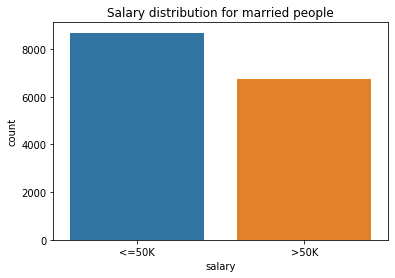

In [44]:
sns.countplot(x="salary", data=married).set(title='Salary distribution for married people')

[Text(0.5, 1.0, 'Salary distribution for unmarried people')]

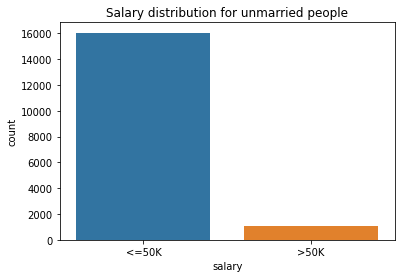

In [45]:
sns.countplot(x="salary", data=not_married).set(title='Salary distribution for unmarried people')

# Exercise 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?


In [46]:
data_clean.hoursperweek.max()

99

In [47]:
max_load = data_clean['hoursperweek'].max()
print("Max time - {0} hours./week.".format(max_load))

Max time - 99 hours./week.


In [48]:
data_clean.groupby("hoursperweek")["salary"].value_counts()

hoursperweek  salary
1             <=50K     18
              >50K       2
2             <=50K     24
              >50K       8
3             <=50K     38
                        ..
97            >50K       1
98            <=50K      8
              >50K       3
99            <=50K     60
              >50K      25
Name: salary, Length: 173, dtype: int64

In [49]:
workaholics = data_clean[(data_clean.hoursperweek == 99) & ( data_clean.salary)]
workaholics

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,salary
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,Not given,174964,10th,6,Married-civ-spouse,Not given,Husband,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
31681,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
31699,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,Not given,<=50K


In [50]:
workaholics.salary.value_counts()

<=50K    60
>50K     25
Name: salary, dtype: int64

In [51]:
percaddict = workaholics[workaholics.salary.isin([">50K"])].shape[0] *100/ len(data_clean[data_clean["hoursperweek"]==99])
percaddict

29.41176470588235

In [52]:
percddict = workaholics[workaholics.salary.isin([">50K"])].shape[0] *100/ data_clean[data_clean["hoursperweek"]==99].shape[0]
percddict

29.41176470588235

# Exercise 10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).

In [53]:
#countrywork = data_clean.groupby("native-country" & "salary" )["hoursperweek"].mean()
data_clean.groupby(['native-country', 'salary'])["hoursperweek"].mean()



native-country  salary
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hoursperweek, Length: 82, dtype: float64

In [54]:
pd.crosstab(data_clean['native-country'], data_clean['salary'], 
           values=data_clean['hoursperweek'], aggfunc=np.mean).T

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


# Exercise 11. Deal with the possible missing values 

data_clean= data.replace("?", "Not given")